In [5]:
import scanpy as sc
import Topyfic
import pandas as pd

k_topics = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [6]:
data = sc.read_h5ad("../data/ModelAD_5x_seurat_only_microglia.h5ad")
df = data.to_df()
df = df.astype(float)

In [7]:
for k in k_topics:
    if k in [5, 6]:
        name = f"{k}/res1/topModel_sc_only_microglia_{k}.p"
    else:
        name = f"{k}/topmodel/topModel_sc_only_microglia_{k}.p"
    #print(name)
    top_model = Topyfic.read_topModel(name)
    score = top_model.rLDA.perplexity(df)
    print(k, ": ", score)

Reading TopModel done!
5 :  16169.746700632646
Reading TopModel done!
10 :  14456.664613220968
Reading TopModel done!
15 :  13113.037837140873
Reading TopModel done!
20 :  13028.324245925402
Reading TopModel done!
25 :  12335.866627175265
Reading TopModel done!
30 :  9695.94553044792
Reading TopModel done!
35 :  9685.516322304047
Reading TopModel done!
40 :  12095.319672522339
Reading TopModel done!
45 :  12588.047761840127
Reading TopModel done!
50 :  9606.611760164793


## number of topics

In [2]:
df = pd.DataFrame(columns=['k', 'N'])

for k in k_topics:
    if k in [5, 6]:
        name = f"{k}/res1/topModel_sc_only_microglia_{k}.p"
    else:
        name = f"{k}/topmodel/topModel_sc_only_microglia_{k}.p"
    
    #print(k, name)
    top_model = Topyfic.read_topModel(name)
    
    tmp = pd.DataFrame([[k, top_model.N]], columns=['k', 'N'])
    df = pd.concat([df, tmp])
df

Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!
Reading TopModel done!


,k,N
0,5,6
0,10,5
0,15,4
0,20,3
0,25,3
0,30,1
0,35,1
0,40,2
0,45,3
0,50,1


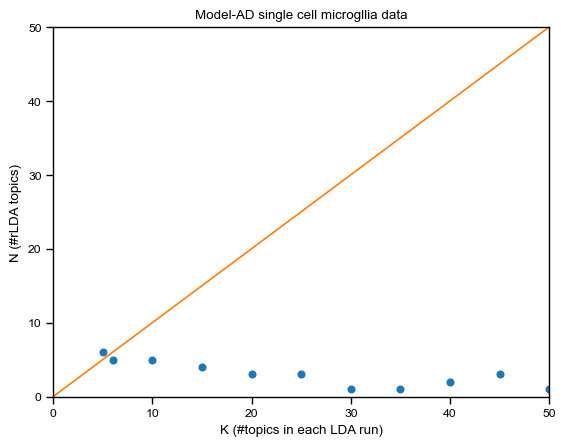

In [20]:
#from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

x = df['k'].tolist()
y = df['N'].tolist()

plt.plot(x, y, 'o')
#plt.plot(xnew, f_linear(xnew), '-', label='linear')
    
plt.plot([0] + k_topics, [0] + k_topics, linestyle='solid')    
#plt.axvline(x=10, color="red", linestyle="solid", label='k=10')
plt.xlabel('K (#topics in each LDA run)')
plt.ylabel('N (#rLDA topics)')
plt.ylim([0,50])
plt.xlim([0,50])
plt.title("Model-AD single cell microgllia data")
#plt.legend(loc='best')
plt.savefig(f'k_n.pdf')

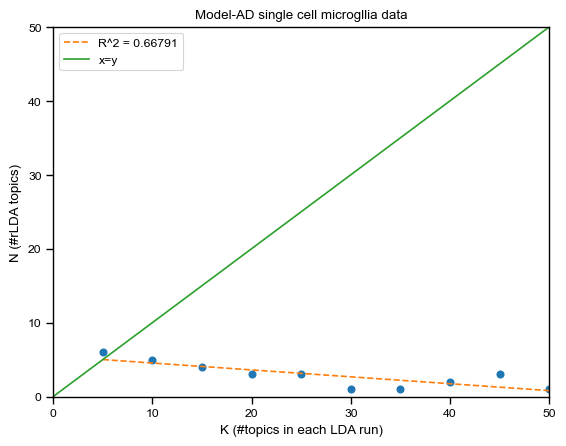

In [3]:
#from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

x = df['k'].tolist()
y = df['N'].tolist()

plt.plot(x, y, 'o')
    
# Define interpolators.
x = df['k'].values.reshape(-1, 1)
y = df['N'].values.reshape(-1, 1)
model = LinearRegression()
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

x_pred = np.linspace(5, 50, num=41, endpoint=True)
y_pred = model.predict(x_pred.reshape(-1, 1))
plt.plot(x_pred, y_pred, 
             linestyle='dashed', 
             label=fr'R^2 = {round(r_sq, 5)}')

    
plt.plot([0] + k_topics, [0] + k_topics, linestyle='solid', label='x=y')    
#plt.axvline(x=10, color="red", linestyle="solid", label='k=10')
plt.xlabel('K (#topics in each LDA run)')
plt.ylabel('N (#rLDA topics)')
plt.ylim([0,50])
plt.xlim([0,50])
plt.title("Model-AD single cell microgllia data")
plt.legend(loc='best')
plt.savefig(f'k_n_prediction.pdf')

In [4]:
model.predict(np.array([5]).reshape(-1, 1))

array([[5.]])